This notebook is used to make predictions of diabetes based on known features. The purpose of this exercise is to demonstrate the power of Machine learning. The dataset contains a range of health-related attributes collected to aid the development of predictive models to identify any risk of diabetes. I will build the model and indicate each phase that was undergoing. Ultimately, I will write detailed documentation explaining everything that happened and my findings. The inspiration for this work is due to my passion for working in the healthcare field and my data science knowledge.
Below are details of this data and columns, along with a link to the data for more information.

Columns:
1.	Id: Unique identifier for each data entry.
2.	Pregnancies: Number of times pregnant.
3.	Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test.
4.	BloodPressure: Diastolic blood pressure (mm Hg).
5.	SkinThickness: Triceps skinfold thickness (mm).
6.	Insulin: 2-Hour serum insulin (mu U/ml).
7.	BMI: Body mass index (weight in kg / height in m^2).
8.	DiabetesPedigreeFunction: Diabetes pedigree function, a genetic score of diabetes.
9.	Age: Age in years.
10.	Outcome: Binary classification indicating the presence (1) or absence (0) of diabetes.

Link to data: https://www.kaggle.com/datasets/nanditapore/healthcare-diabetes

## Import needed libraries

In [27]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

## Load the data

In [28]:
diabetes_df = pd.read_csv('Healthcare-Diabetes.csv')
diabetes_df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


## Data Preparation

In [29]:
# Get the shape of data
diabetes_df.shape

(2768, 10)

In [30]:
# Cheak information about the data
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


In [31]:
# Confirm that there is no missing values
diabetes_df.isnull().sum()

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [32]:
# Count the number distinct element
diabetes_df['Id'].nunique()

2768

In [33]:
# Check for statistical propertices of the data
diabetes_df.describe()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,799.197097,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


In [34]:
# Count the element in the outcome 
diabetes_df['Outcome'].value_counts()

Outcome
0    1816
1     952
Name: count, dtype: int64

In [35]:
# Check for unique Age
diabetes_df['Age'].unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68], dtype=int64)

In [36]:
# Get the count of each Age int he dataset
diabetes_df['Age'].nunique()

52

In [37]:
# Create age buckets
age_buckets = ["[{0} - {1})".format(age_range, age_range + 10) for age_range in range(20, 100, 10)]
diabetes_df['age_range'] = pd.cut(diabetes_df['Age'], bins=8, labels=age_buckets)

In [38]:
diabetes_df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_range
0,1,6,148,72,35,0,33.6,0.627,50,1,[50 - 60)
1,2,1,85,66,29,0,26.6,0.351,31,0,[30 - 40)
2,3,8,183,64,0,0,23.3,0.672,32,1,[30 - 40)
3,4,1,89,66,23,94,28.1,0.167,21,0,[20 - 30)
4,5,0,137,40,35,168,43.1,2.288,33,1,[30 - 40)


In [39]:
# Check the Age range count
diabetes_df['age_range'].value_counts()

age_range
[20 - 30)     1347
[30 - 40)      512
[40 - 50)      410
[50 - 60)      244
[60 - 70)      128
[70 - 80)       90
[80 - 90)       33
[90 - 100)       4
Name: count, dtype: int64

In [40]:
# Drop the Age and ID column
diabetes_df.drop(['Id', 'Age'], axis=1, inplace=True)

In [41]:
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome,age_range
0,6,148,72,35,0,33.6,0.627,1,[50 - 60)
1,1,85,66,29,0,26.6,0.351,0,[30 - 40)
2,8,183,64,0,0,23.3,0.672,1,[30 - 40)
3,1,89,66,23,94,28.1,0.167,0,[20 - 30)
4,0,137,40,35,168,43.1,2.288,1,[30 - 40)
...,...,...,...,...,...,...,...,...,...
2763,2,75,64,24,55,29.7,0.370,0,[30 - 40)
2764,8,179,72,42,130,32.7,0.719,1,[30 - 40)
2765,6,85,78,0,0,31.2,0.382,0,[40 - 50)
2766,0,129,110,46,130,67.1,0.319,1,[20 - 30)


## Data Validation

In [42]:
# Create a contingency table between the age range and Outcome
crosstab_01 = pd.crosstab(diabetes_df['age_range'], diabetes_df['Outcome'])
crosstab_01

Outcome,0,1
age_range,,
[20 - 30),1091,256
[30 - 40),269,243
[40 - 50),208,202
[50 - 60),104,140
[60 - 70),56,72
[70 - 80),59,31
[80 - 90),25,8
[90 - 100),4,0


<AxesSubplot:xlabel='age_range'>

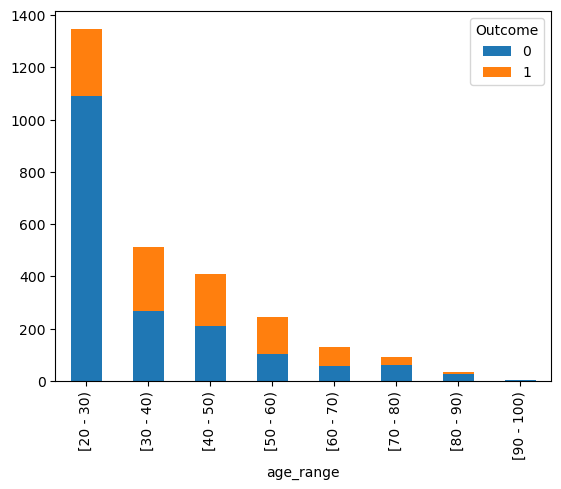

In [43]:
# Plot 
crosstab_01.plot(kind='bar', stacked = True)

In [44]:
crosstab_norm = crosstab_01.div(crosstab_01.sum(1), axis = 0)
crosstab_norm

Outcome,0,1
age_range,,
[20 - 30),0.809948,0.190052
[30 - 40),0.525391,0.474609
[40 - 50),0.507317,0.492683
[50 - 60),0.426230,0.573770
[60 - 70),0.437500,0.562500
[70 - 80),0.655556,0.344444
[80 - 90),0.757576,0.242424
[90 - 100),1.000000,0.000000


<AxesSubplot:title={'center':'Bar Graph of Age range with Response Overlay'}, xlabel='age_range'>

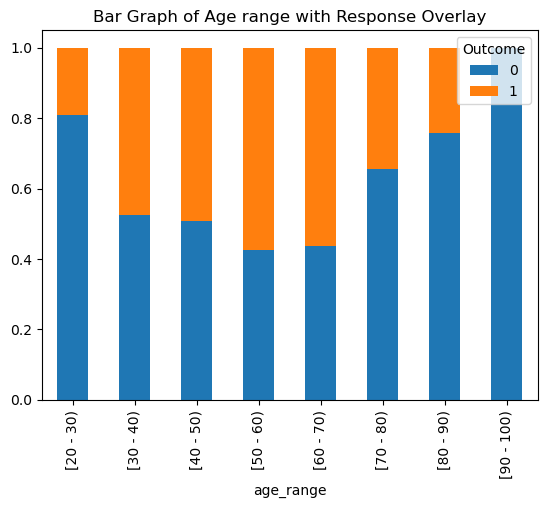

In [45]:
crosstab_norm.plot(kind='bar', stacked = True,
                title = 'Bar Graph of Age range with Response Overlay')

In [46]:
diabetes_df.dtypes

Pregnancies                    int64
Glucose                        int64
BloodPressure                  int64
SkinThickness                  int64
Insulin                        int64
BMI                          float64
DiabetesPedigreeFunction     float64
Outcome                        int64
age_range                   category
dtype: object

In [47]:
# Label Encode the age range

# Initialize the Label Encoder
age_encode = LabelEncoder()
diabetes_df['age_range_encoded'] = age_encode.fit_transform(diabetes_df['age_range'])

In [48]:
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome,age_range,age_range_encoded
0,6,148,72,35,0,33.6,0.627,1,[50 - 60),3
1,1,85,66,29,0,26.6,0.351,0,[30 - 40),1
2,8,183,64,0,0,23.3,0.672,1,[30 - 40),1
3,1,89,66,23,94,28.1,0.167,0,[20 - 30),0
4,0,137,40,35,168,43.1,2.288,1,[30 - 40),1
...,...,...,...,...,...,...,...,...,...,...
2763,2,75,64,24,55,29.7,0.370,0,[30 - 40),1
2764,8,179,72,42,130,32.7,0.719,1,[30 - 40),1
2765,6,85,78,0,0,31.2,0.382,0,[40 - 50),2
2766,0,129,110,46,130,67.1,0.319,1,[20 - 30),0


In [49]:
# Define the feature names
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'age_range_encoded']

## Data Scaling

In [50]:
# Scale the data
scaler = MinMaxScaler()
scaler.fit(diabetes_df[feature_names])

MinMaxScaler()

## Preparing data for the model

In [51]:
X = diabetes_df[feature_names].values
y = diabetes_df['Outcome'].values

## Train | Test Split

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
# help(train_test_split)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [55]:
print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 1854 rows
Test Set: 914 rows


In [65]:
# Import the models
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay, roc_auc_score

In [57]:
# Instantiate the models
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='scale')))
models.append(('RFC', RandomForestClassifier(n_estimators=100, random_state=42)))
models.append(('DTR', DecisionTreeRegressor()))

In [58]:
# Defind and empty list to hold the name and results

results = []
names = []

In [59]:
# Create a function to capture the various models
for name, model in models:
    
    
    # Creating K-Fold Cross-Validator
    kfold = model_selection.KFold(n_splits=10)
    
     # Cross-Validation
    cross_val_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
                                                        
    # Storing Results
    results.append(cross_val_results)
    names.append(name)
                                                        
    # Printing Results
    message = "{}: {} ({})".format(name, cross_val_results.mean(), cross_val_results.std())
    print(message)

KNN: 0.9035577878930571 (0.06850078172348256)
NB: 0.7611991838016009 (0.021079877033913973)
SVC: 0.7651716109454298 (0.02374843853486308)
RFC: 0.9920420656097944 (0.015250469800865854)
DTR: 0.9902343954376602 (0.019549617885385305)


In [60]:
# Initialize the Random Forest Classifier
RandomForestClassifier_model = RandomForestClassifier(n_estimators=100)

# Train the model
RandomForestClassifier_model.fit(X_train, y_train)

RandomForestClassifier()

In [61]:
# Make predictions
RandomForestClassifier_model_prediction = RandomForestClassifier_model.predict(X_test)

# Calculate accuracy
RandomForestClassifier_model_accuracy = accuracy_score(y_test, RandomForestClassifier_model_prediction)
print(f"Accuracy: {RandomForestClassifier_model_accuracy:.2f}")

Accuracy: 0.97


## Evaluate the Trained Model

In [62]:
predictions = RandomForestClassifier_model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [0 0 1 0 1 0 0 0 0 1]
Actual labels   :  [0 0 1 0 1 0 0 0 0 1]


In [63]:
# Creating the classification report
print('Random Forest Classifier: \n', classification_report(y_test, predictions, target_names=['0', '1']))

Random Forest Classifier: 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       616
           1       0.96      0.96      0.96       298

    accuracy                           0.97       914
   macro avg       0.97      0.97      0.97       914
weighted avg       0.97      0.97      0.97       914



In [66]:
# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, predictions)
print(f'ROC-AUC Score: {roc_auc}')

ROC-AUC Score: 0.9693138237601324


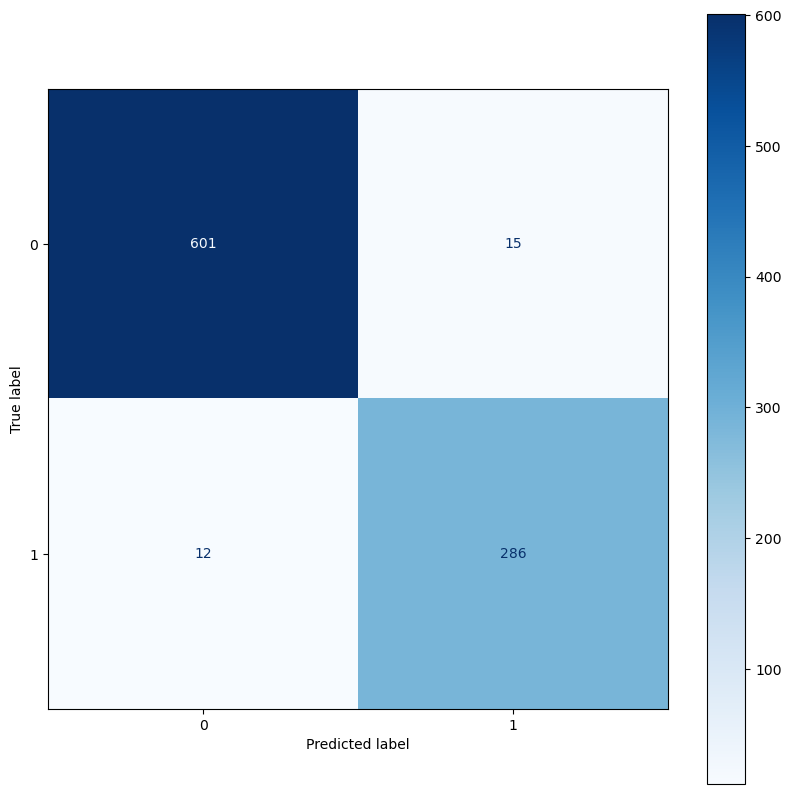

In [67]:
# Creating a confusion matix
con_RandomForestClassifier_matrix = confusion_matrix(y_test, predictions)
con_RandomForestClassifier_matrix_display = ConfusionMatrixDisplay(con_RandomForestClassifier_matrix) 
fig, ax = plt.subplots(figsize=(10,10))
con_RandomForestClassifier_matrix_display.plot(cmap=plt.cm.Blues, ax=ax)

## Save the Model

In [68]:
import joblib
# Save the trained model to a file
joblib.dump(RandomForestClassifier_model, 'random_forest_classifier_model.pkl')

print("Model saved successfully!")

Model saved successfully!


## Use the Model

In [69]:
# Load the saved model from the file
model = joblib.load('random_forest_classifier_model.pkl')

print("Model loaded successfully!")

new_data = np.array([[31,1,85,66,29,0,26.6,0.351]]).astype('float64')
print('New Data: {}'.format(list(new_data[0])))

# Predict on the new data
predictions = model.predict(new_data)

# Print the predictions
print("Predictions on new data:", predictions)

Model loaded successfully!
New Data: [31.0, 1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351]
Predictions on new data: [0]


## THE END